## Data Analytics - Lab 3 - Prior and Posterior predictive distributions
<br>
Jan Pomykacz<br>
Nr. albumu: 401623<br>
Grupa: czwartek, 9:30

In [16]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

### Modeling prior predictive distribution

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.



         lp__  accept_stat__       N            y            p
count  1000.0         1000.0  1000.0  1000.000000  1000.000000
mean      0.0            0.0    50.0    10.119000     0.199954
std       0.0            0.0     0.0     2.775345     0.010109
min       0.0            0.0    50.0     1.000000     0.167008
25%       0.0            0.0    50.0     8.000000     0.193239
50%       0.0            0.0    50.0    10.000000     0.199964
75%       0.0            0.0    50.0    12.000000     0.206789
max       0.0            0.0    50.0    19.000000     0.230648
Mean of ratio: 0.20238000000000006


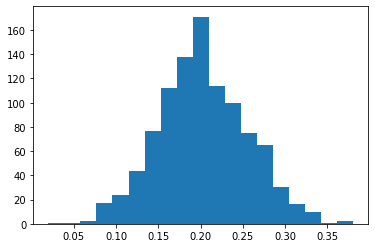

In [36]:
gen_quant = CmdStanModel(stan_file='prior.stan')

samples = gen_quant.sample(data={'N':50}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

df = samples.draws_pd()
ratio = df["y"] / 50
plt.hist(ratio, bins=19)
print(df.describe())
print(f"Mean of ratio: {ratio.mean()}")

# Mean of the ratio is consistent with prior knowledge, because for 1000 samples in multiple experiments it's around 20%

### Modeling posterior and posterior predictive distribution

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status

chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,p,y_pred
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.0,4000.000000,4000.000000,4000.000000
mean,-23.184210,0.927281,0.995647,1.429250,2.576000,0.0,23.660125,0.198399,9.938000
std,0.665617,0.107359,0.122178,0.573216,1.401683,0.0,0.928820,0.009880,2.860717
min,-27.885400,0.199381,0.817560,1.000000,1.000000,0.0,22.683200,0.168048,2.000000
25%,-23.357350,0.898402,0.936802,1.000000,1.000000,0.0,22.982775,0.191530,8.000000
50%,-22.923900,0.974519,1.003430,1.000000,3.000000,0.0,23.387900,0.198441,10.000000
75%,-22.734675,1.000000,1.062275,2.000000,3.000000,0.0,24.045975,0.205218,12.000000
max,-22.682900,1.000000,1.158170,3.000000,7.000000,0.0,30.465900,0.230394,20.000000


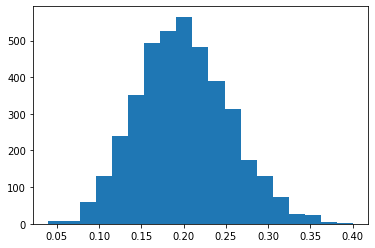

In [18]:
gen_quant2 = CmdStanModel(stan_file='posterior.stan')

samples2 = gen_quant2.sample(data={'N':50,'y':7})

df2 = samples2.draws_pd()
ratio2 = df2["y_pred"] / 50
plt.hist(ratio2, bins=19)
df2.describe()

In [27]:
predicted_ratio_stats = az.summary(ratio2.to_numpy(), hdi_prob=0.94)
predicted_p_stats = az.summary(df["p"].to_numpy(), hdi_prob=0.94)
print("Ratio stats: expected value = {0}, 94% density interval = {1}".format(predicted_ratio_stats["mean"][0], predicted_ratio_stats["hdi_97%"][0]))
print("p stats: expected value = {0}, 94% density interval = {1}".format(predicted_p_stats["mean"][0], predicted_p_stats["hdi_97%"][0]))

ratio_lower_prob = (ratio2 < 0.2).sum() / ratio2.count()
print(f"Probability that ratio is lower than the avg probability of traditional vaccines: {ratio_lower_prob}")

arviz - WARNING - Shape validation failed: input_shape: (1, 4000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)


Ratio stats: expected value = 0.199, 94% density interval = 0.3
p stats: expected value = 0.2, 94% density interval = 0.22
Probability that ratio is lower than the avg probability of traditional vaccines: 0.45425
